In [19]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from typing import List

In [20]:
def percent_to_bucket(score: float, num_buckets=7) -> int:
    return int((score * 100) // (100 / num_buckets))

In [40]:
data = pd.read_csv('tweets_medium.csv')

In [41]:
def collect_buckets(scores: List[float]) -> List[int]:
    buckets = [0 for _ in range(7)]
    for score in scores:
        buckets[percent_to_bucket(score)] += 1
    return buckets

In [42]:
toxicity = collect_buckets(data['toxicity'])
severe_toxicity = collect_buckets(data['severe_toxicity'])
obscene = collect_buckets(data['obscene'])
identity_attack = collect_buckets(data['identity_attack'])
insult = collect_buckets(data['insult'])
threat = collect_buckets(data['threat'])
sexual_explicit = collect_buckets(data['sexual_explicit'])

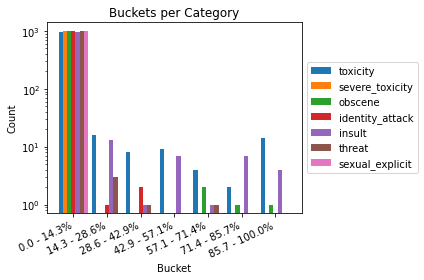

In [64]:
labels = [f"{round(1/7 * i * 100, 1)} - {round(1/7 * (i+1) * 100,1)}%" for i in range(7)]

x = np.arange(len(labels))  # the label locations
width = 1 / 8  # the width of the bars

fig, ax = plt.subplots()
rects_toxicity = ax.bar(x - 3 * width, toxicity, width, label='toxicity')
rects_severe_toxicity = ax.bar(
    x - 2 * width, severe_toxicity, width, label='severe_toxicity')
rects_obscene = ax.bar(x - width, obscene, width, label='obscene')
rects_identity_attack = ax.bar(
    x, identity_attack, width, label='identity_attack')
rects_insult = ax.bar(x + width, insult, width, label='insult')
rects_threat = ax.bar(x + 2 * width, threat, width, label='threat')
rects_sexual_explicit = ax.bar(
    x + 3 * width, sexual_explicit, width, label='sexual_explicit')

ax.set_ylabel('Count')
ax.set_xlabel('Bucket')
ax.set_title('Buckets per Category')
ax.set_xticks(x, labels)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_yscale("log")

fig.autofmt_xdate(rotation=25)
fig.tight_layout()
plt.savefig('sentiment_of_tweets.png', facecolor='white')
